In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path=r"C:\Users\Mrityunjay\Desktop\Data science naresh it\Class notes by me\EDA_\bank.csv"
bank_df=pd.read_csv(file_path,sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [52]:
#check the numerical columns.
num_col=[i for i,j in dict(bank_df.dtypes).items() if j!="object"]    #checking numerical columns
num_col

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_update']

Text(0.5, 1.0, 'Box_plot')

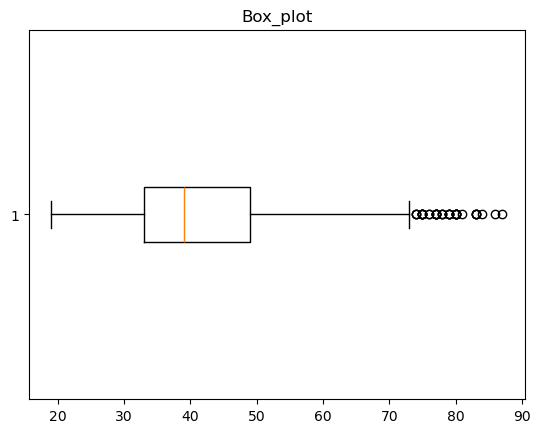

In [54]:
#checking the outliers using the boxplot.
age_data=bank_df["age"]
plt.boxplot(age_data,vert=False)
plt.title("Box_plot")

Text(0.5, 1.0, 'Histogram')

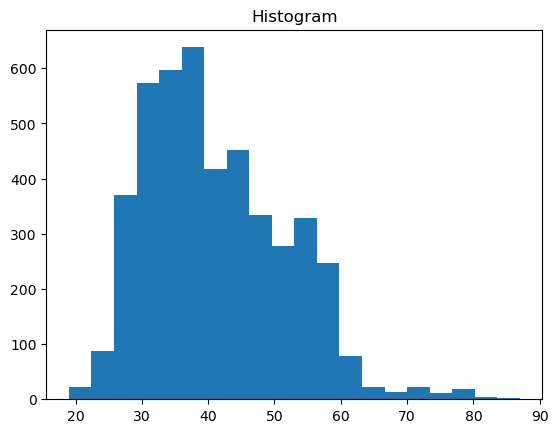

In [5]:
age_data=bank_df["age"]
plt.hist(age_data,bins=20)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram_')

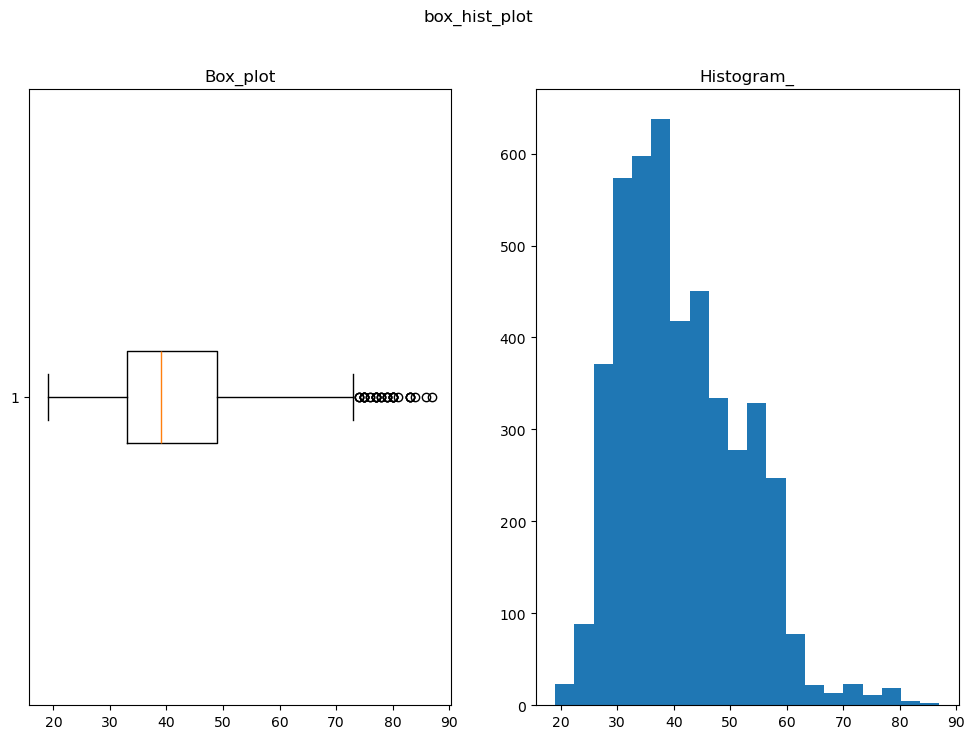

In [58]:
#Plot the boxplot and histogram two different way.
age_data=bank_df["age"]
plt.figure(figsize=(12,8))
plt.suptitle("box_hist_plot")

plt.subplot(1,2,1)
plt.boxplot(age_data,vert=False)
plt.title("Box_plot")

plt.subplot(1,2,2)
plt.hist(age_data,bins=20)
plt.title("Histogram_")

Text(0.5, 1.0, 'Histogram_')

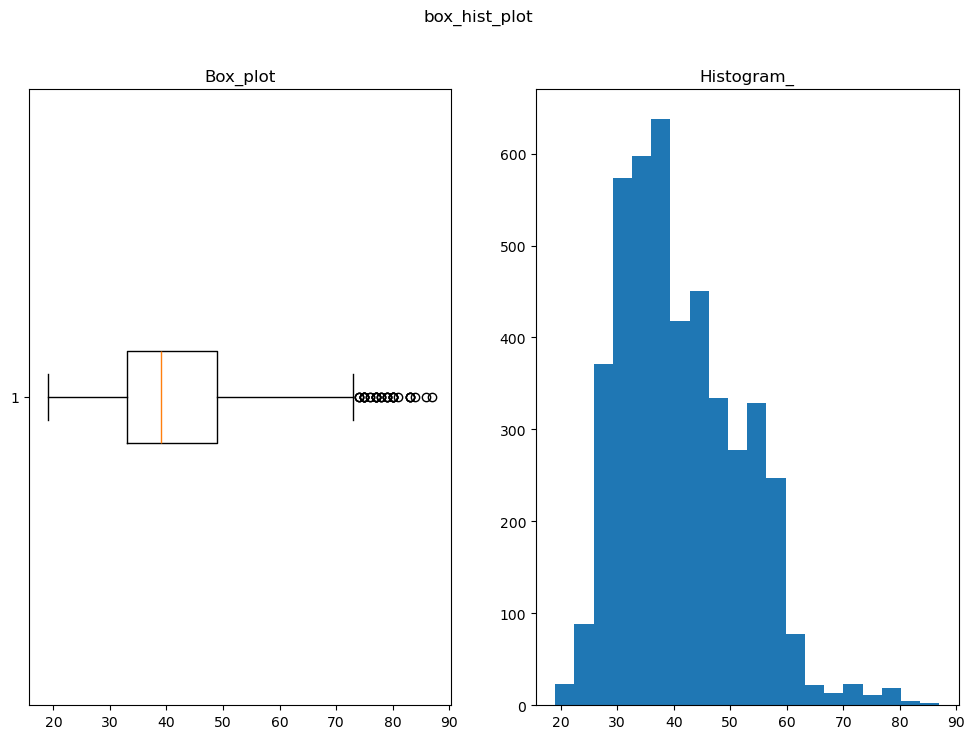

In [7]:
#again use 
age_data=bank_df["age"]
plt.figure(figsize=(12,8))
plt.suptitle("box_hist_plot")

plt.subplot(1,2,1).boxplot(age_data,vert=False)
plt.title("Box_plot")

plt.subplot(1,2,2).hist(age_data,bins=20)
plt.title("Histogram_")

In [8]:
#Mean,median,mode

mean=np.mean(bank_df["age"])   #mean age column
median=np.median(bank_df["age"])  #median age column
std=np.std(bank_df["age"])  #standard deviation  age column
mean,median,std

(41.17009511170095, 39.0, 10.575041217961282)

In [9]:
#25 percentile, 50 pecentile, 75 precentile

Q1=np.percentile(bank_df["age"],25)  #25 percentile value
Q2=np.percentile(bank_df["age"],50)  #50 percentile value
Q3=np.percentile(bank_df["age"],75)  #75 percentile value
Q1,Q2,Q3

(33.0, 39.0, 49.0)

In [10]:
#inter Quartile range
IQR=Q3-Q1
IQR

16.0

In [11]:
#lower bound(lb),upper bound(ub)
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR
ub,lb

(73.0, 9.0)

In [12]:
#outliers in age column
con1=bank_df["age"]>ub
con2=bank_df["age"]<lb
con3=con1|con2
outliers_df=age_data[con3]
outliers_df

36      78
129     77
166     78
199     75
412     75
477     77
573     81
633     83
688     80
1126    77
1230    75
1312    80
1349    83
1415    75
1422    79
1437    77
1866    86
1949    78
1956    77
2014    74
2070    80
2678    74
2848    80
2896    80
3157    75
3193    76
3202    79
3205    77
3311    87
3360    79
3495    76
3690    80
3750    79
3786    74
4047    75
4108    84
4323    83
4388    83
Name: age, dtype: int64

Text(0.5, 1.0, 'Histogram_')

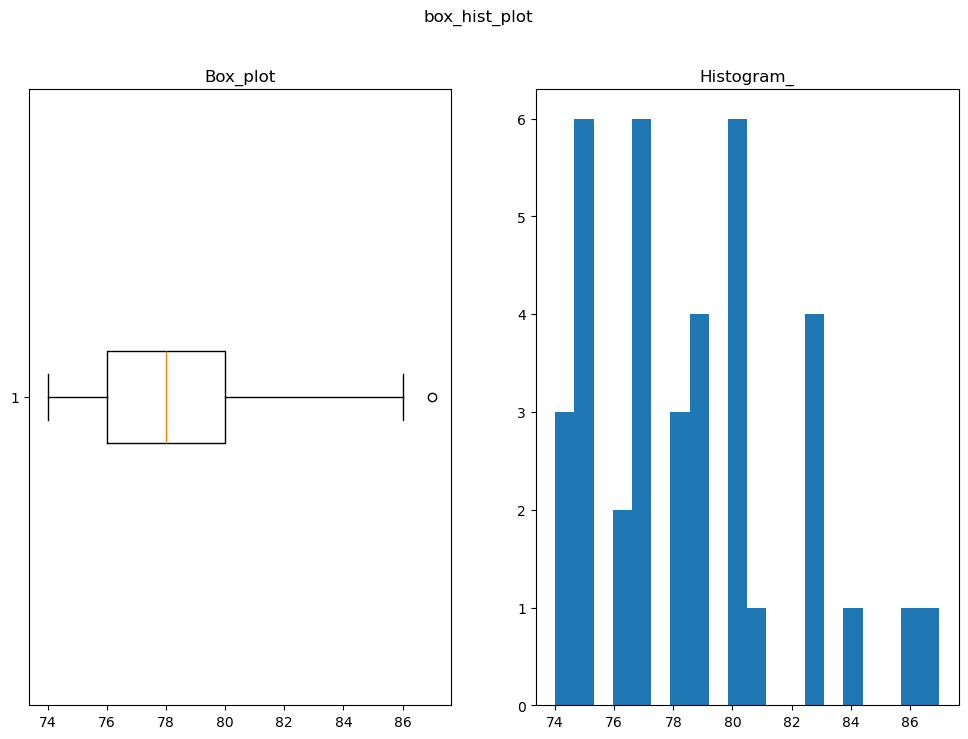

In [13]:
#plot the outliers in age column 

plt.figure(figsize=(12,8))
plt.suptitle("box_hist_plot")

plt.subplot(1,2,1).boxplot(outliers_df,vert=False)
plt.title("Box_plot")

plt.subplot(1,2,2).hist(outliers_df,bins=20)
plt.title("Histogram_")

In [14]:
con1=age_data>lb
con2=age_data<ub
con3=con1&con2
non_outliers_df=age_data[con2]
non_outliers_df

0       30
1       33
2       35
3       30
4       59
        ..
4516    33
4517    57
4518    57
4519    28
4520    44
Name: age, Length: 4477, dtype: int64

Text(0.5, 1.0, 'Histogram_')

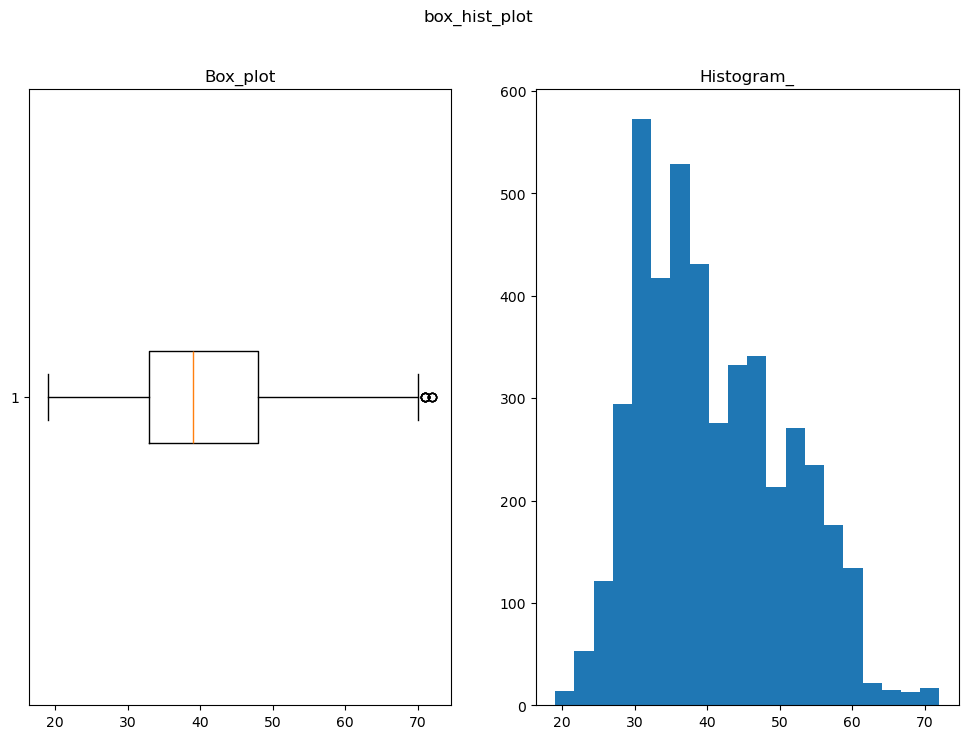

In [15]:
#After removing outliers plot the age columns 
age_data=bank_df["age"]
plt.figure(figsize=(12,8))
plt.suptitle("box_hist_plot")

plt.subplot(1,2,1).boxplot(non_outliers_df,vert=False)
plt.title("Box_plot")

plt.subplot(1,2,2).hist(non_outliers_df,bins=20)
plt.title("Histogram_")

In [16]:
#outliers in the age columns
age_data=bank_df["age"]
con1=age_data>ub
con2=age_data<lb
con3=con1|con2
outliers_df=bank_df[con3]
outliers_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
129,77,retired,divorced,tertiary,no,4659,no,no,cellular,14,apr,161,1,-1,0,unknown,yes
166,78,housemaid,married,secondary,no,499,no,no,telephone,16,mar,80,4,-1,0,unknown,no
199,75,retired,married,secondary,no,3771,no,no,telephone,15,apr,185,1,181,2,success,yes
412,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
477,77,retired,married,tertiary,no,7802,no,no,telephone,4,may,421,1,92,2,success,yes
573,81,retired,married,secondary,no,1,no,no,cellular,19,aug,65,5,-1,0,unknown,no
633,83,retired,married,secondary,no,0,no,no,cellular,18,mar,140,10,-1,0,unknown,no
688,80,management,married,primary,no,6483,no,no,telephone,19,oct,123,1,-1,0,unknown,no
1126,77,retired,married,secondary,no,610,no,no,cellular,13,aug,766,3,-1,0,unknown,no


In [17]:
#non outliers of the datasets
age_data=bank_df["age"]
con1=age_data>lb
con2=age_data<ub
con3=con1&con2
non_outliers_df=bank_df[con2]
non_outliers_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


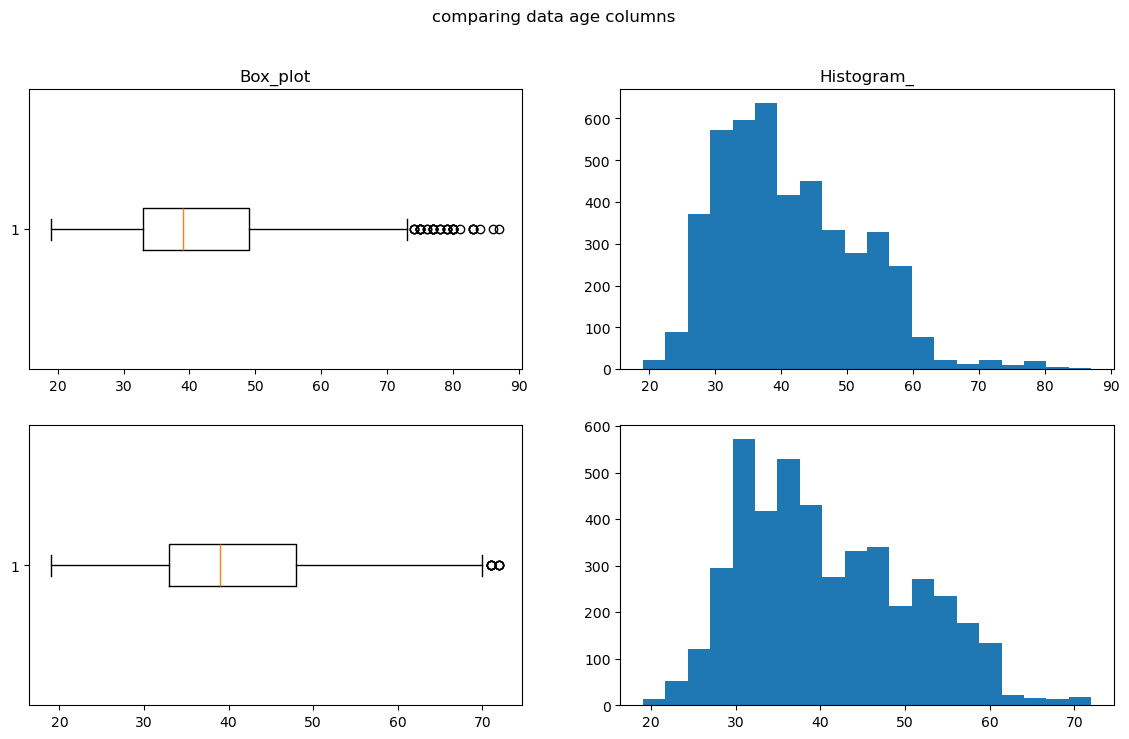

In [18]:
#######################Data#################################
age_data=bank_df["age"]
age_non_outliers_df=non_outliers_df["age"]

#####################non outlier############################
plt.figure(figsize=(14,8))
plt.suptitle("comparing data age columns")

plt.subplot(2,2,1)
plt.boxplot(age_data,vert=False)
plt.title("Box_plot")

plt.subplot(2,2,2)
plt.hist(age_data,bins=20)
plt.title("Histogram_")
#####################entire data outliers###########################
plt.subplot(2,2,3)
plt.boxplot(age_non_outliers_df,vert=False)
plt.subplot(2,2,4)
plt.hist(age_non_outliers_df,bins=20)
plt.show()

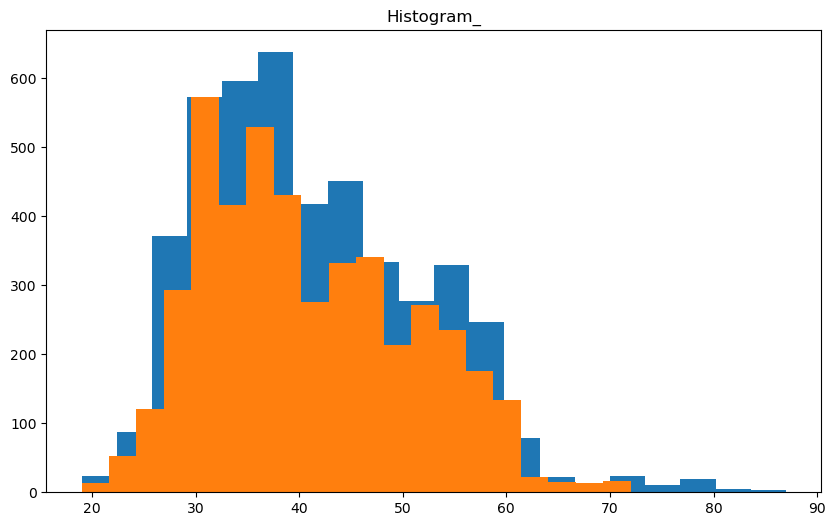

In [19]:
#######################Data#################################
age_data=bank_df["age"]
age_non_outliers_df=non_outliers_df["age"]

plt.figure(figsize=(10,6))
plt.hist(age_data,bins=20)
plt.hist(age_non_outliers_df,bins=20)
plt.title("Histogram_")
plt.show()

**How to deals outliers with medians?**

In [21]:
###############Deal with median value######################

Q1=np.percentile(bank_df["age"],25)  #25 percentile value
Q2=np.percentile(bank_df["age"],50)  #50 percentile value
Q3=np.percentile(bank_df["age"],75)  #75 percentile value

#############IQR(inter Qurtile range)#####################

IQR=Q3-Q1

################lower bound(lb),upper bound(ub)###############
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR

##############################################################

con1=bank_df["age"]>ub
con2=bank_df["age"]<lb
con3=con1|con2

######################### median value ##########################
median=np.median(bank_df["age"])

In [22]:
l=[]
for i in age_data:
    if i<lb or i>ub:
        median1=age_data.median()
        l.append(median1)
    else:
        l.append(i)
print(l)


[30, 33, 35, 30, 59, 35, 36, 39, 41, 43, 39, 43, 36, 20, 31, 40, 56, 37, 25, 31, 38, 42, 44, 44, 26, 41, 55, 67, 56, 53, 68, 31, 59, 32, 49, 42, 39.0, 32, 33, 23, 38, 36, 52, 32, 32, 34, 55, 26, 32, 61, 45, 37, 38, 34, 53, 48, 57, 33, 36, 54, 41, 63, 48, 48, 56, 51, 31, 29, 41, 32, 37, 42, 31, 41, 56, 54, 41, 40, 50, 40, 27, 60, 28, 52, 37, 51, 41, 35, 38, 34, 39, 34, 27, 32, 57, 41, 41, 30, 36, 31, 36, 38, 49, 57, 34, 32, 37, 33, 56, 27, 21, 58, 32, 33, 25, 25, 30, 22, 39, 46, 31, 45, 32, 36, 51, 34, 24, 45, 32, 39.0, 41, 37, 43, 48, 27, 33, 29, 34, 52, 60, 32, 32, 56, 31, 42, 35, 56, 48, 46, 37, 41, 36, 45, 55, 39, 35, 55, 55, 27, 34, 34, 25, 41, 43, 28, 31, 39.0, 45, 48, 32, 42, 37, 40, 32, 42, 43, 44, 37, 37, 37, 28, 32, 34, 40, 34, 34, 34, 37, 36, 56, 49, 33, 30, 36, 23, 57, 27, 38, 42, 39.0, 34, 48, 35, 39, 29, 45, 42, 29, 38, 56, 36, 25, 38, 57, 31, 42, 45, 30, 49, 49, 53, 37, 49, 41, 54, 32, 33, 33, 36, 35, 52, 40, 44, 45, 30, 48, 33, 57, 57, 51, 34, 50, 44, 27, 50, 36, 42, 32,

In [23]:
l=np.where(con3,median,age_data)
l

array([30., 33., 35., ..., 57., 28., 44.])

In [24]:
#After chaingin value of outliers plot
bank_df["age_update"]=l
bank_df[["age","age_update"]]

,age,age_update
0,30,30.0
1,33,33.0
2,35,35.0
3,30,30.0
4,59,59.0
...,...,...
4516,33,33.0
4517,57,57.0
4518,57,57.0
4519,28,28.0


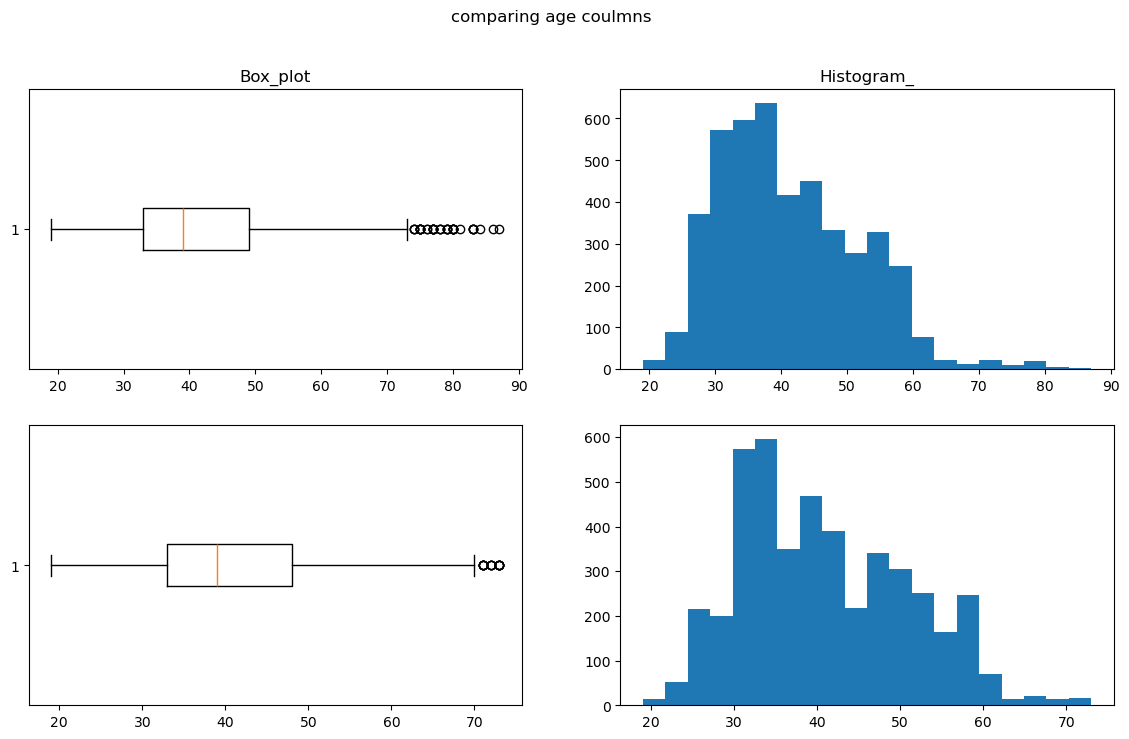

In [25]:
###############data################

age_data=bank_df["age"]
age_update_data=bank_df["age_update"]

####################################
plt.figure(figsize=(14,8))
plt.suptitle("comparing age coulmns ")

#####################################
plt.subplot(2,2,1)
plt.boxplot(age_data,vert=False)
plt.title("Box_plot")

plt.subplot(2,2,2)
plt.hist(age_data,bins=20)
plt.title("Histogram_")
######################################
plt.subplot(2,2,3)
plt.boxplot(age_update_data,vert=False)
plt.subplot(2,2,4)
plt.hist(age_update_data,bins=20)
plt.show()